We make a small synthetic example of how to compute and use the sPlot formalism via the `hep_ml` library.

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import norm, expon
from hep_ml import splot

np.random.seed(2210)

%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 6]
font_size = 24

/usr/local/lib/python3.5/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


We construct signal and background masses and momenta, and mix them into a single data set.

In [2]:
size = 10000

sig_mass_distr = norm(loc=4, scale=1)
bck_mass_distr = expon(scale=4)

sig_mass = sig_mass_distr.rvs(size=size)
bck_mass = bck_mass_distr.rvs(size=size)
sig_p = np.random.normal(5, 1, size=size)
bck_p = np.random.normal(3, 1, size=size)

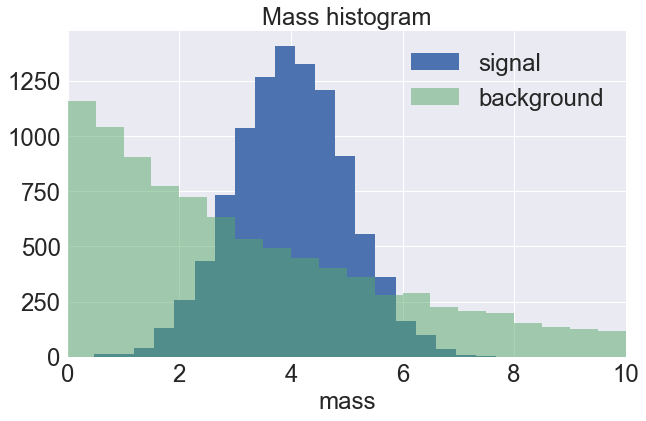

In [3]:
plt.hist(sig_mass, bins=20, label="signal")
plt.hist(bck_mass, bins=20, range=(0, 10), alpha=0.5,label="background")
plt.xlim(0,10)
plt.tick_params(labelsize=font_size)
plt.xlabel('mass',fontsize=font_size)
plt.legend(fontsize=font_size)
plt.title('Mass histogram',fontsize=font_size)
plt.savefig('splot_prior_mass.pdf')

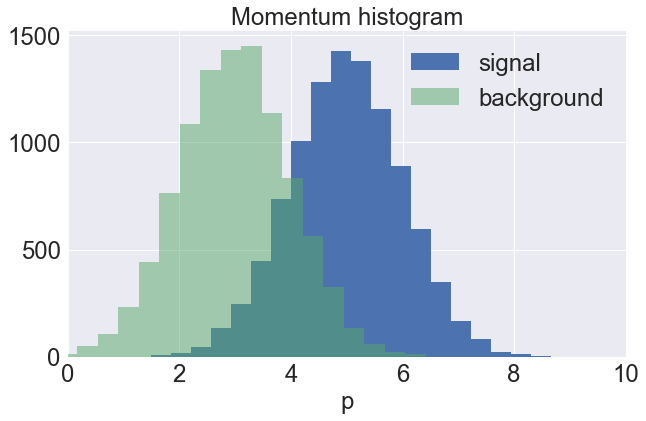

In [4]:
plt.hist(sig_p, bins=20, label="signal")
plt.hist(bck_p, bins=20, alpha=0.5,label="background")
plt.xlabel('p',fontsize=font_size)
plt.xlim(0,10)
plt.tick_params(labelsize=font_size)
plt.legend(fontsize=font_size)
plt.title('Momentum histogram',fontsize=font_size)
plt.margins(x=0)
plt.savefig('splot_prior_momentum.pdf')

In [5]:
mass = np.concatenate([sig_mass, bck_mass])
p = np.concatenate([sig_p, bck_p])

sorter = np.argsort(mass)
mass = mass[sorter]
p = p[sorter]

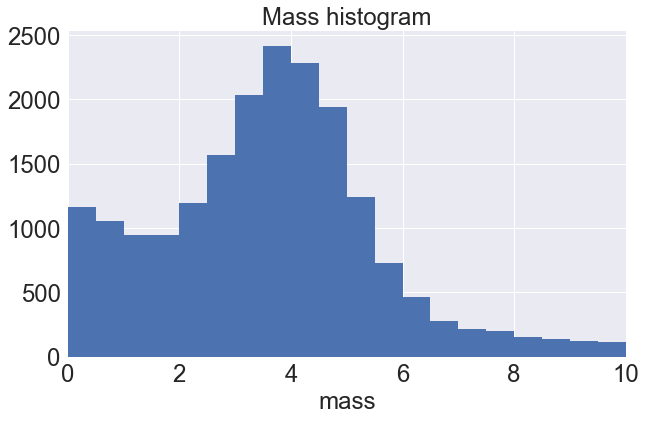

In [6]:
plt.hist(mass, bins=20, range=(0, 10))
plt.xlabel('mass',fontsize=font_size)
plt.tick_params(labelsize=font_size)
plt.margins(x=0)
plt.title('Mass histogram',fontsize=font_size)
plt.savefig('splot_mass_data.pdf')

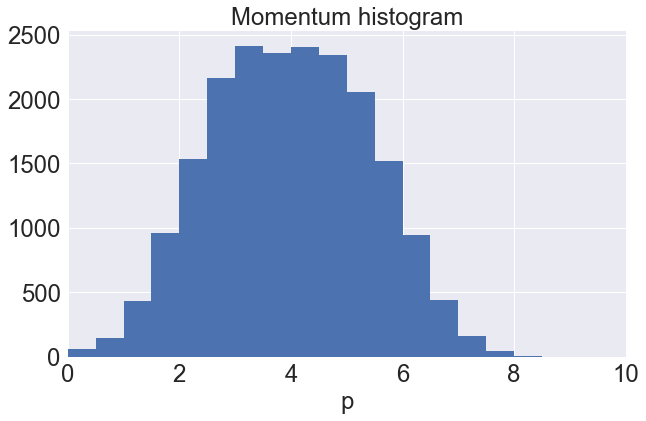

In [7]:
plt.hist(p, bins=20, range=(0, 10))
plt.xlabel('p',fontsize=font_size)
plt.tick_params(labelsize=font_size)
plt.margins(x=0)
plt.title('Momentum histogram',fontsize=font_size)
plt.savefig('splot_momentum_data.pdf')

Using the mass as discriminating variable, we fit the functions over the data set to obtain probabilities.

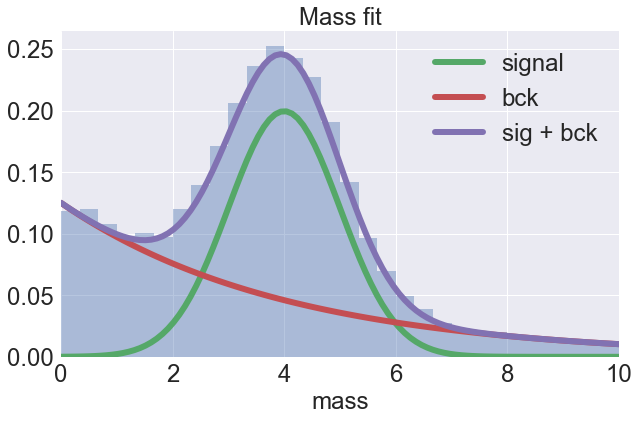

In [8]:
x = np.linspace(0, 10,100)
plt.hist(mass, bins=30, range=[0, 10], normed=True, alpha=0.4)
plt.plot(x, norm.pdf(x, loc=4, scale=1) / 2., label='signal',lw=6)
plt.plot(x, expon.pdf(x, scale=4) / 2., label='bck',lw=6)
plt.plot(x, 0.5 * (norm.pdf(x, loc=4, scale=1) + expon.pdf(x, scale=4)), label='sig + bck',lw=6)
plt.legend(fontsize=font_size)
plt.tick_params(labelsize=font_size)
plt.margins(x=0)
plt.title('Mass fit',fontsize=font_size)
plt.xlabel('mass',fontsize=font_size)
plt.savefig('splot_fit.pdf')

In [9]:
probs = pd.DataFrame(dict(sig=sig_mass_distr.pdf(mass), bck=bck_mass_distr.pdf(mass)))
probs = probs.div(probs.sum(axis=1), axis=0)

In [10]:
probs

,bck,sig
0,0.999464,5.358254e-04
1,0.999464,5.364235e-04
2,0.999463,5.373556e-04
3,0.999462,5.376041e-04
4,0.999460,5.399284e-04
5,0.999459,5.412272e-04
6,0.999459,5.414016e-04
7,0.999459,5.414928e-04
8,0.999458,5.421563e-04
9,0.999458,5.422057e-04


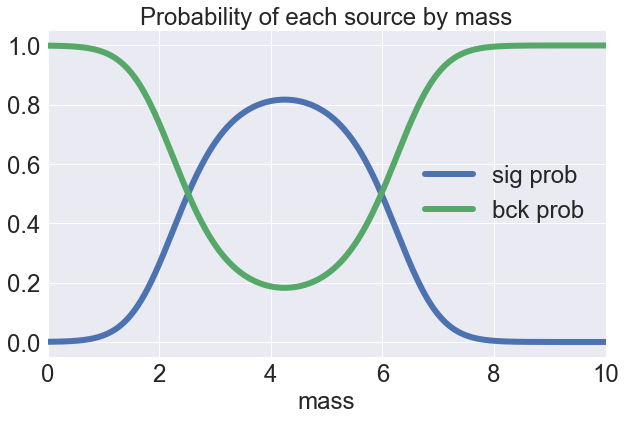

In [11]:
plt.plot(mass, probs.sig, label='sig prob',lw=6)
plt.plot(mass, probs.bck, label='bck prob',lw=6)
plt.xlim(0, 10), plt.legend(fontsize=font_size)
plt.tick_params(labelsize=font_size)
plt.xlabel('mass',fontsize=font_size)
plt.title('Probability of each source by mass',fontsize=font_size)
plt.margins(x=0)
plt.savefig('splot_probabilities.pdf')

These probabilities are then transformed to sweights.

In [12]:
sWeights = splot.compute_sweights(probs)

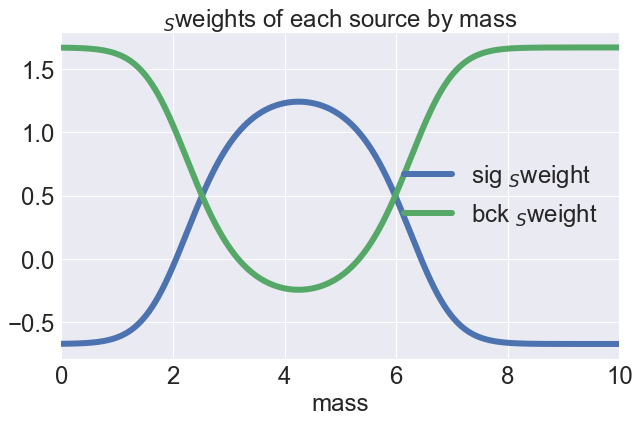

In [13]:
plt.plot(mass, sWeights.sig, label='sig $_S$weight',lw=6)
plt.plot(mass, sWeights.bck, label='bck $_S$weight',lw=6)
plt.tick_params(labelsize=font_size)
plt.xlim(0, 10), plt.legend(fontsize=font_size), plt.xlabel('mass',fontsize=font_size)
plt.title('$_S$weights of each source by mass',fontsize=font_size)
plt.margins(x=0)
plt.savefig('splot_sweights.pdf')

Using the sweights, we can reconstruct the momentum, because, for each source, mass and momentum is uncorrelated.

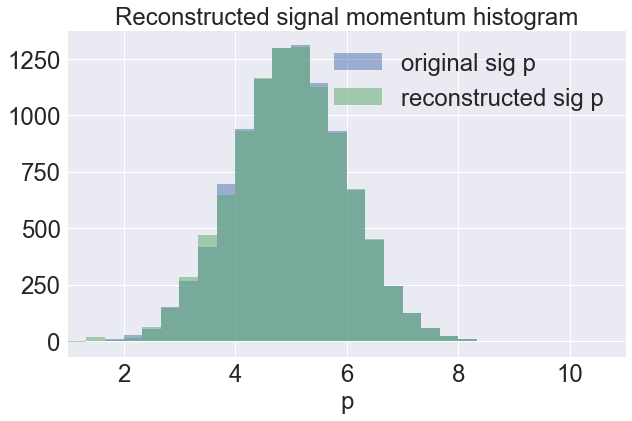

In [14]:
hist_conf = dict(bins=30, alpha=0.5, range=[1, 11])
plt.hist(sig_p, label='original sig p', **hist_conf)
plt.hist(p, weights=sWeights.sig, label='reconstructed sig p', **hist_conf)
plt.xlabel('p',fontsize=font_size), plt.legend(fontsize=font_size)
plt.title('Reconstructed signal momentum histogram',fontsize=font_size)
plt.tick_params(labelsize=font_size)
plt.margins(x=0)
plt.savefig('splot_reconstructed_signal.pdf')

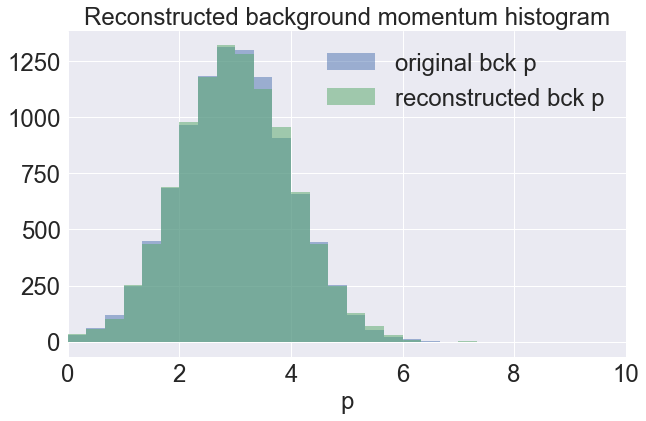

In [15]:
hist_conf = dict(bins=30, alpha=0.5, range=[0, 10])
plt.hist(bck_p, label='original bck p', **hist_conf)
plt.hist(p, weights=sWeights.bck, label='reconstructed bck p', **hist_conf)
plt.xlabel('p',fontsize=font_size), plt.legend(fontsize=font_size)
plt.title('Reconstructed background momentum histogram',fontsize=font_size)
plt.tick_params(labelsize=font_size)
plt.margins(x=0)
plt.savefig('splot_reconstructed_background.pdf')

In [16]:
np.corrcoef(abs(mass - 4), p) [0, 1]

-0.3320408359895089

In [17]:
print(np.corrcoef(abs(sig_mass - 4), sig_p)[0, 1])
print(np.corrcoef(abs(bck_mass - 4), bck_p)[0, 1])

0.00532915600518
0.0142429576886


The mass, however, is fully correlated, hence the sPlot technique does not work.

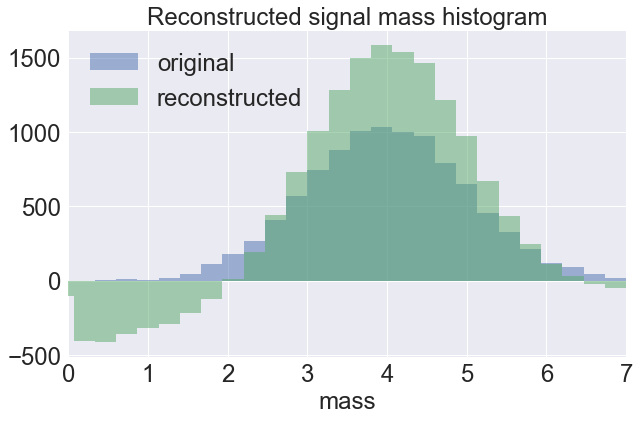

In [18]:
hist_conf = dict(bins=30, alpha=0.5, range=[-1, 7])
plt.hist(sig_mass, label='original', **hist_conf)
plt.hist(mass, weights=sWeights.sig, label='reconstructed', **hist_conf)
plt.xlabel('mass',fontsize=font_size), plt.legend(fontsize=font_size)
plt.tick_params(labelsize=font_size)
plt.title('Reconstructed signal mass histogram',fontsize=font_size)
plt.xlim(0,7)
plt.margins(x=0)
plt.savefig('splot_reconstructed_mass.pdf')